# Logistic Regression (Binary Classification)

*   For classification problem we use Logistic Regression
*   Binary classficiation: When outcome has only two categories. (yea/no, 0/1, buy/not buy) e.g. Predicting whether customer will buy insurance policy
*   Multiclass classification: When outcome has more than two categoirs. e.g Which party a person is going to vote for (BJP, Congres, AAP)

[Notebook Reference](ML/7_logistic_reg/7_logistic_regression.ipynb),    [Youtube Reference](https://youtu.be/zM4VZR0px8E)

**Problem Statement:Predicting if a person would buy life insurnace based on his age using logistic regression**

Load the data in pandas dataframe

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

#This code will work if ur running notebook locally and files are available on local system
df = pd.read_csv('/content/insurance.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


Lets plot the scatter plot to visualize the data

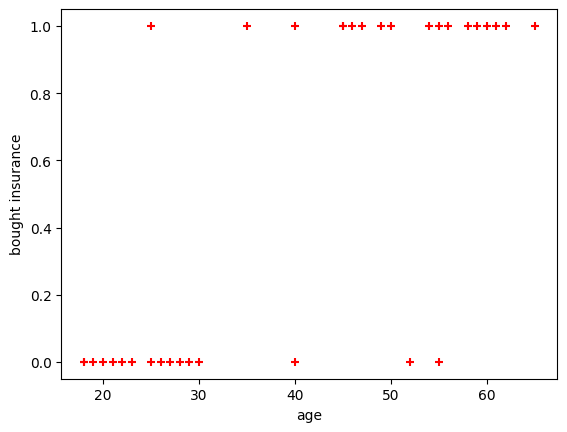

In [ ]:
plt.xlabel('age')
plt.ylabel('bought insurance')
plt.scatter(df.age, df.bought_insurance, marker="+", color='red')

From data distribution its clear that line wont be good fit.

In [ ]:
df.shape # gives size of the dataframe (no of rows, no of column)

(34, 2)

In [ ]:
df.size #Gives total number parameters in dataframeL

68

Lets split the data using sklearn library

In [ ]:
len(df) # Get total number of rows

34

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(df[['age']],df.bought_insurance, test_size=0.3) # note we can also provide train_size here
len(X_train)

23

Now lets import the logistic regression class

In [ ]:
from sklearn.linear_model import LogisticRegression # imprting LoigsticRegression class

model = LogisticRegression() # Create a logisticRegression class object (classifier)

Now lets train the model

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

Now lets predict the values for X_test

In [ ]:
X_test

,age
18,19
23,45
14,49
1,25
24,50
22,40
8,62
28,65
16,25
9,61


In [ ]:
model.predict(X_test)

array([0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
model.score(X_test,y_test)

0.8181818181818182

Since we have only 3 records in test data, score will be always very high

Now lets see the probability for each class

In [ ]:
model.predict_proba(X_test)

array([[0.978472  , 0.021528  ],
       [0.47298886, 0.52701114],
       [0.32916516, 0.67083484],
       [0.9483835 , 0.0516165 ],
       [0.29673032, 0.70326968],
       [0.65624771, 0.34375229],
       [0.06450354, 0.93549646],
       [0.04199842, 0.95800158],
       [0.9483835 , 0.0516165 ],
       [0.07423368, 0.92576632],
       [0.39889855, 0.60110145]])

Here column 1 represent the 'Not buy' probability of the insurance where column 2 represent 'buy' probability of the insurance

# Confusion Matrix

In [ ]:
y_pred=model.predict(X_test)
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
cm

Confusion Matrix:


array([[2, 0],
       [2, 7]])

# Representing Confusion Matrix using Heat map

Text(95.72222222222221, 0.5, 'Actual')

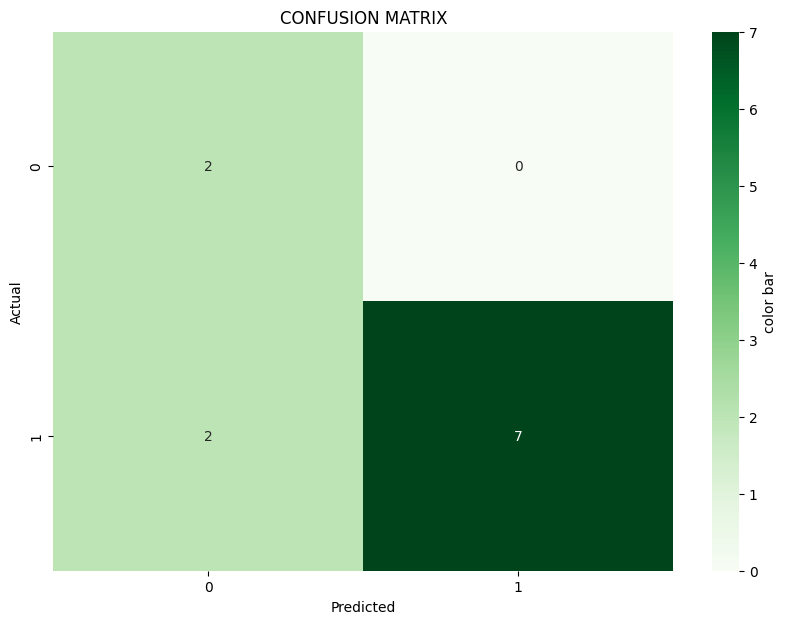

In [ ]:
import seaborn as sns
plt.figure(figsize= (10,7))
sns.heatmap(cm,cmap="Greens",annot=True,cbar_kws={"orientation":"vertical","label":"color bar"})
plt.title("CONFUSION MATRIX")
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Performance Measures - Accuraccy, Misclassification or Error Rate, Precision, Recall and F1 Score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8181818181818182

# Extract TP,TN,FP,FN from Confusion Matrix

In [ ]:
TP,TN,FP,FN = confusion_matrix(y_test,y_pred).ravel()
(TP,TN,FP,FN)

(2, 0, 2, 7)

In [ ]:
Precision = TP / (TP+FP)
Recall = TP / (TP+FN)
F1_Score = (2 * Precision * Recall) / (Precision + Recall)

In [ ]:
print("Performance Metrics")
Precision


Performance Metrics


0.5

In [ ]:
Recall

0.2222222222222222

In [ ]:
F1_Score

0.30769230769230765